In [1]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
import bamboolib as bam
bam.enable()

scipy: 1.5.2
numpy: 1.18.5
matplotlib: 3.3.2
pandas: 1.1.2
sklearn: 0.20.3
statsmodels: 0.12.0
Success: the bamboolib extension was enabled successfully. You can disable it via 'bam.disable()'. You will now see a magic bamboolib button when you display your dataframes, for example via 'df'


262800


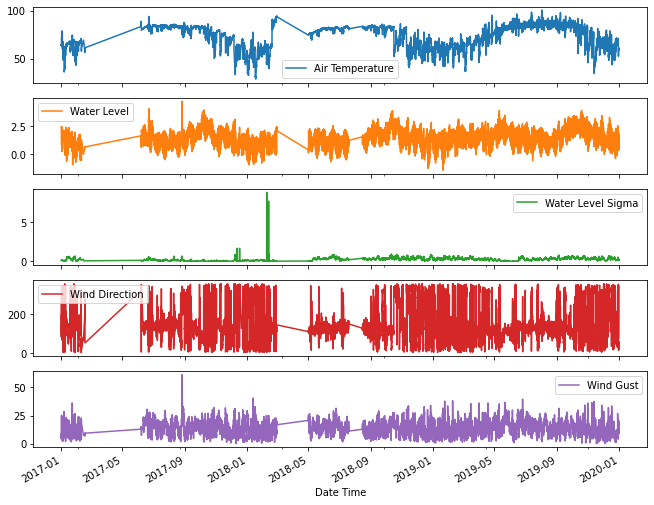

In [4]:
from pandas import read_csv
train = read_csv('BHPtraining.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
test = read_csv('BHPtest.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(len(train))
dfcol = ['Air Temperature', 'Water Level', 'Water Level Sigma', 'Wind Direction', 'Wind Gust']
train = train.resample('D').mean()
test = test.resample('D').mean()
train.dropna(inplace=True)

axes = train[dfcol].plot(figsize=(11, 9), subplots=True)


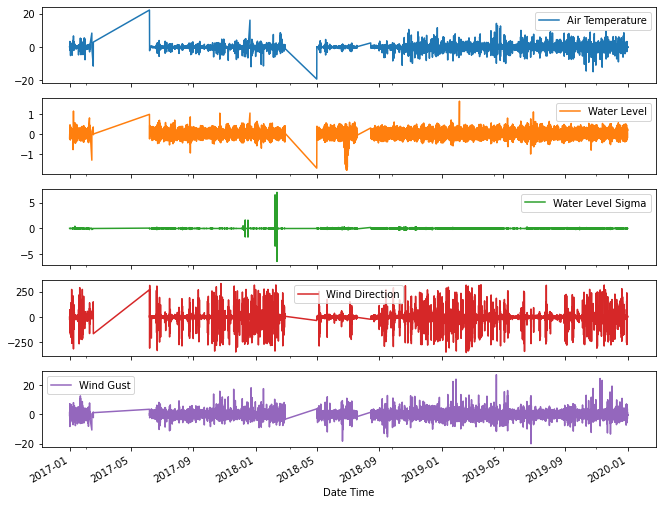

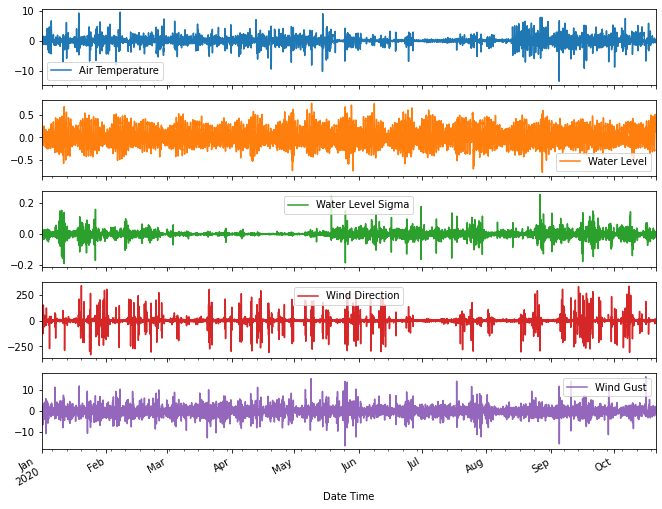

In [5]:
from pandas import read_csv
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot

# difference data
stationary = train.diff()
stationaryTest = test.diff()
axes = stationary[dfcol].plot(figsize=(11, 9), subplots=True)
axes = stationaryTest[dfcol].plot(figsize=(11, 9), subplots=True)


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(11,12))
pyplot.subplot(411)
plot_acf(stationary['Water Level'], ax=pyplot.gca())
pyplot.subplot(412)
plot_pacf(stationary['Water Level'], ax=pyplot.gca())
pyplot.subplot(413)
plot_acf(stationary['Air Temperature'], ax=pyplot.gca())
pyplot.subplot(414)
plot_pacf(stationary['Air Temperature'], ax=pyplot.gca())
pyplot.tight_layout()
pyplot.show()

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
import six
sys.modules['sklearn.externals.six'] = six
import pmdarima as pm

model = pm.auto_arima(train['Air Temperature'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())
